https://r4ds.had.co.nz/

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


`ggplot2::ggplot()` tells us that we explicitely are using the `ggplot()` frunction from the `ggplot2` package

## The Question

__Do cars with big engines use more fuel than cars with small engines__

In [2]:
str(mpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


In [3]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


summarize only numerical values

In [4]:
summary(dplyr::select_if(mpg, is.numeric))

     displ            year           cyl             cty             hwy       
 Min.   :1.600   Min.   :1999   Min.   :4.000   Min.   : 9.00   Min.   :12.00  
 1st Qu.:2.400   1st Qu.:1999   1st Qu.:4.000   1st Qu.:14.00   1st Qu.:18.00  
 Median :3.300   Median :2004   Median :6.000   Median :17.00   Median :24.00  
 Mean   :3.472   Mean   :2004   Mean   :5.889   Mean   :16.86   Mean   :23.44  
 3rd Qu.:4.600   3rd Qu.:2008   3rd Qu.:8.000   3rd Qu.:19.00   3rd Qu.:27.00  
 Max.   :7.000   Max.   :2008   Max.   :8.000   Max.   :35.00   Max.   :44.00  

## Data Visualizations

https://r4ds.had.co.nz/data-visualisation.html

create a gg plot of to key variables `displ` _(car engine size, in liters)_ and _(car's fuel efficency on the highway when they travel the same distance)_

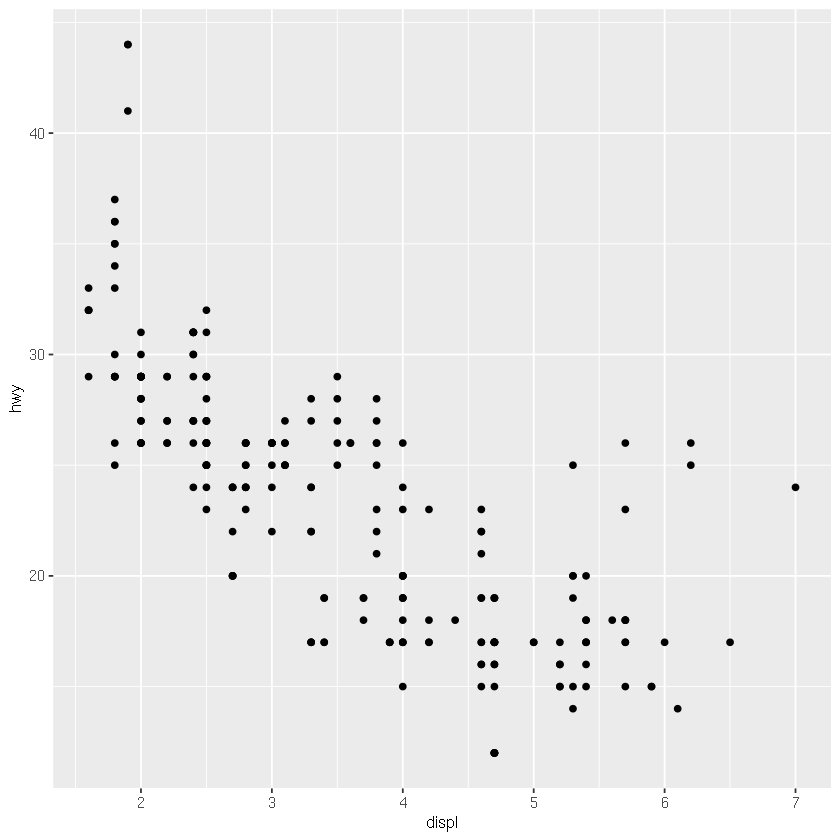

In [5]:
ggplot(data = mpg) + 
geom_point(mapping = aes(x = displ, y = hwy))

In this plot we can see a _negative_ relationship between the engine size `displ` and the car's fuel effenciency `hwy`. Therefore, the bigger the engine it appears the lower the car's fuel effenciey, which suggest that more the engine uses of fuel. 

it appears we have a cluster of 6 values in the mid-right section of the plot between displ (5, 7) and hwy (22, 25), Lets see if we can find a solution to this _hypothesis:_
        
        These cars are hybrids

For the soluton we can utilze the `class` variable that classifies cars into groups such as compact, midsize, and SUV. 

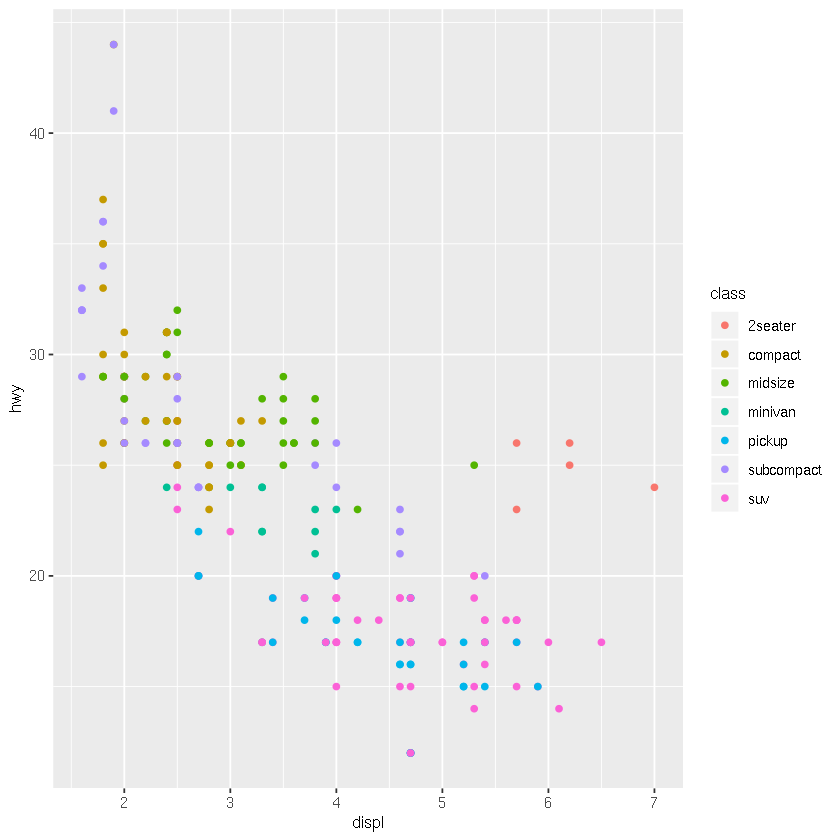

In [6]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy, color = class))

This is the same plot from the plot above, we just indicated the class by color. We already know that there is a negative relationship between fuel efficency and engine size. Now we can also see clusters in the `class` of type of car. These are not hybrid cars, these are 2 seater: sports cars. 


Warning message:
“Using alpha for a discrete variable is not advised.”

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

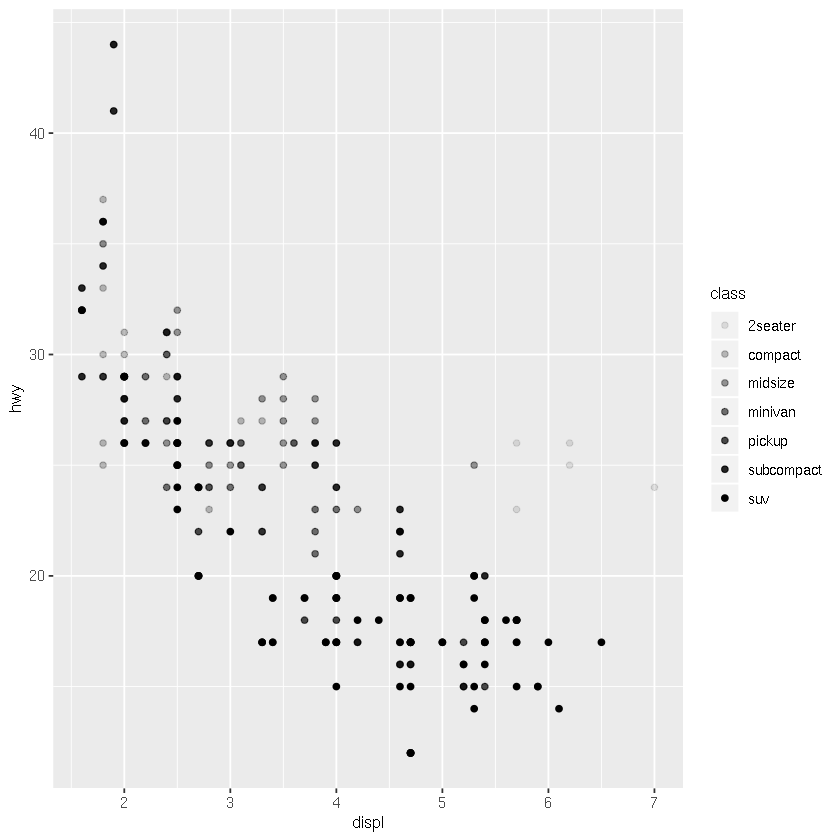

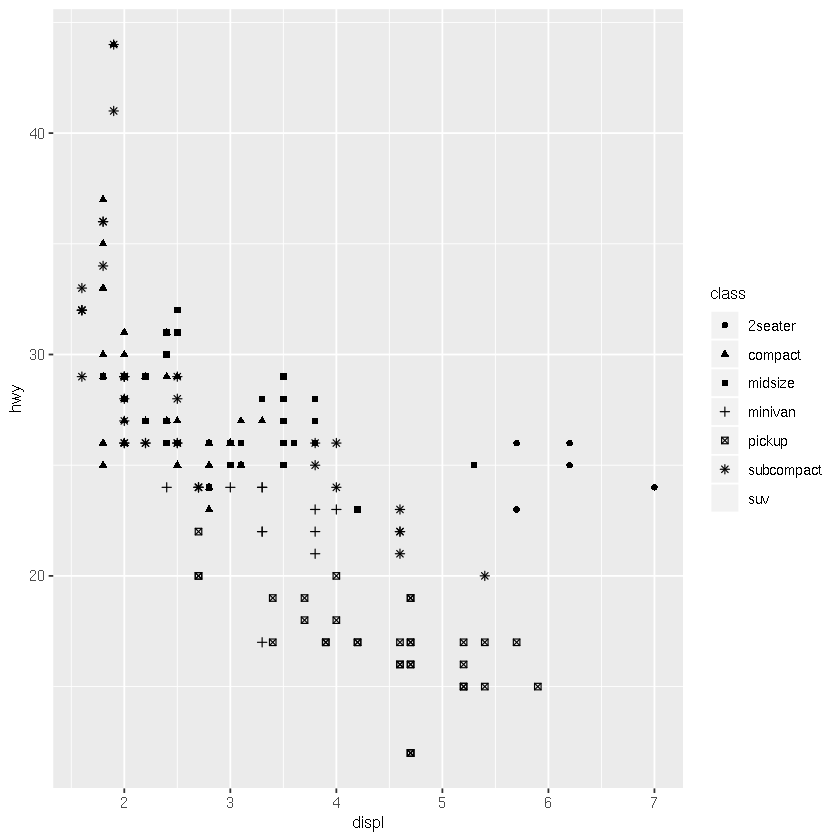

In [7]:
# Left
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

# Right
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


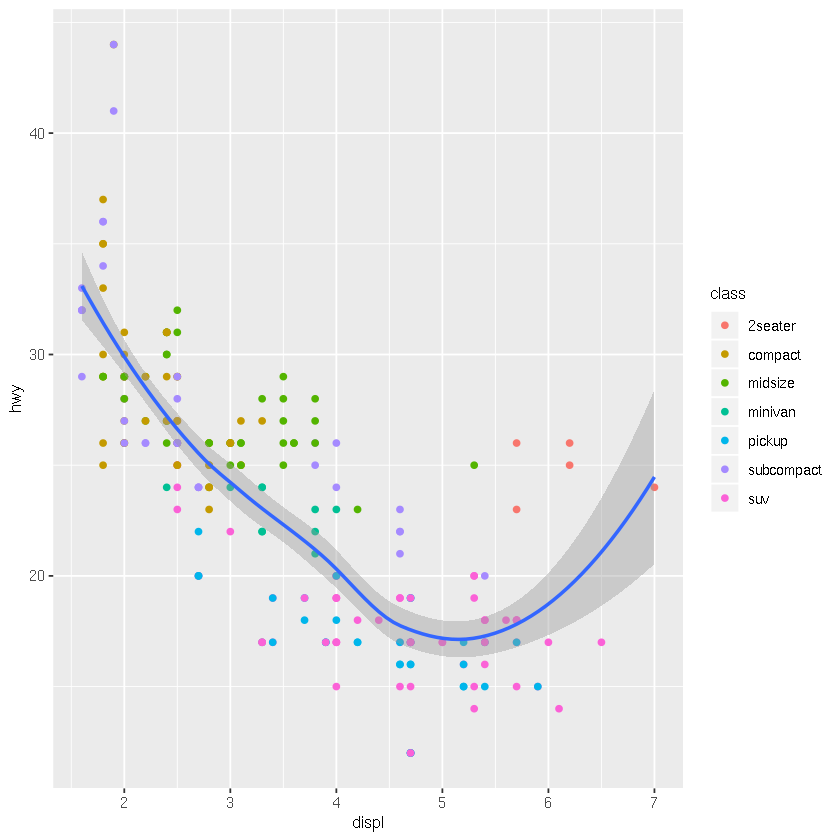

In [8]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth()

smooth line displays just a subset of the mpg dataset, the subcompact cars. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


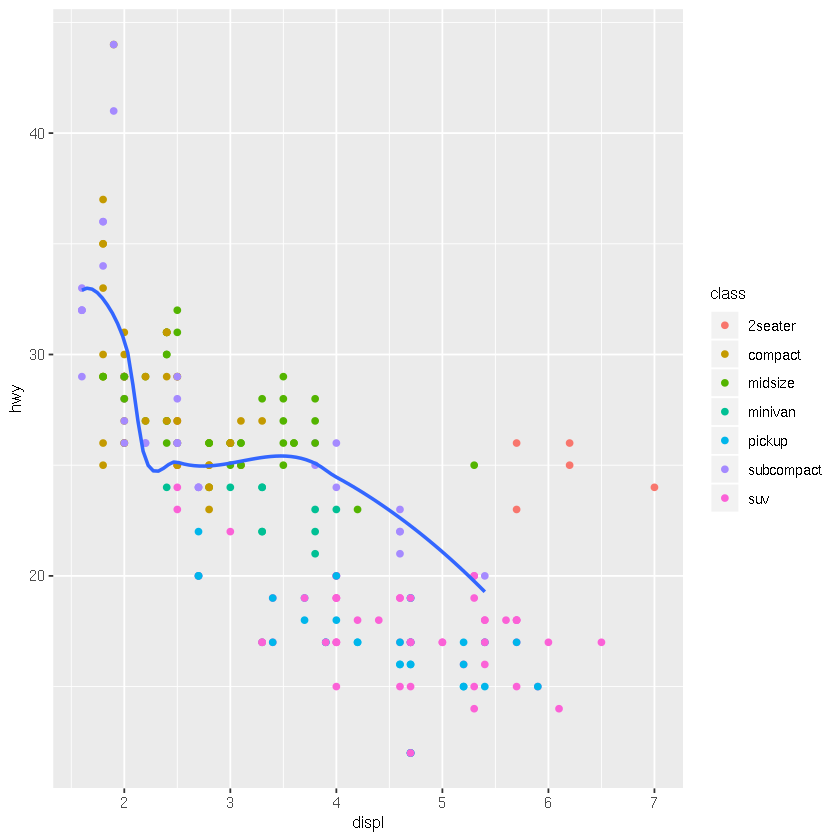

In [9]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)

## Exploratory Data Analysis

https://r4ds.had.co.nz/exploratory-data-analysis.html

In [12]:
str(diamonds)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


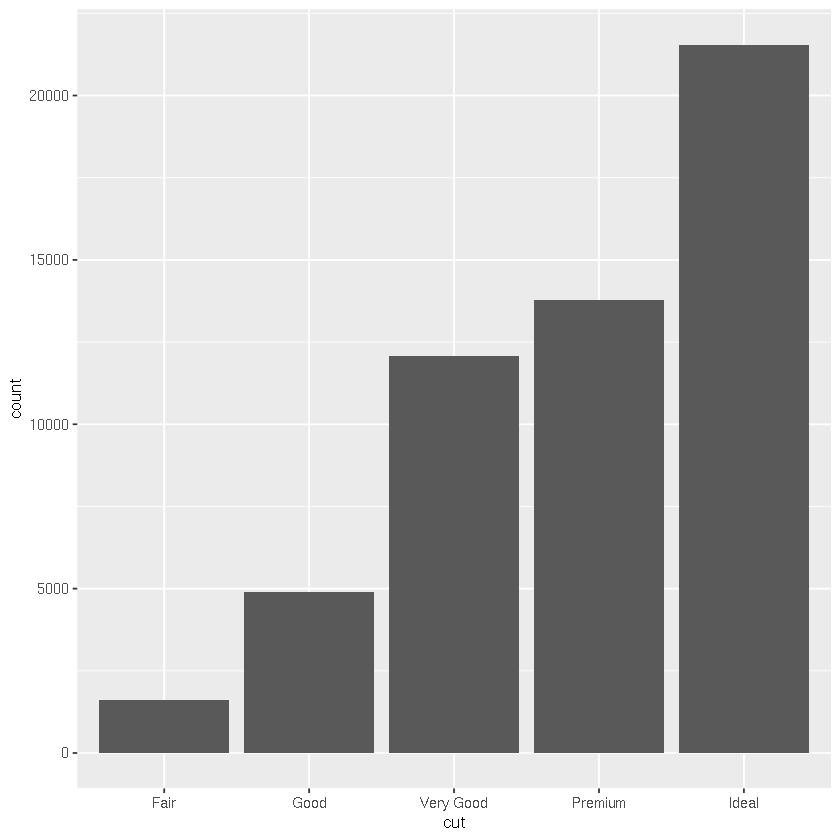

In [11]:
ggplot(data = diamonds) + 
    geom_bar(mapping= aes(x = cut))

Frequency Table

In [13]:
diamonds %>%
    count(cut)

cut,n
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


histogram for the continuous data set

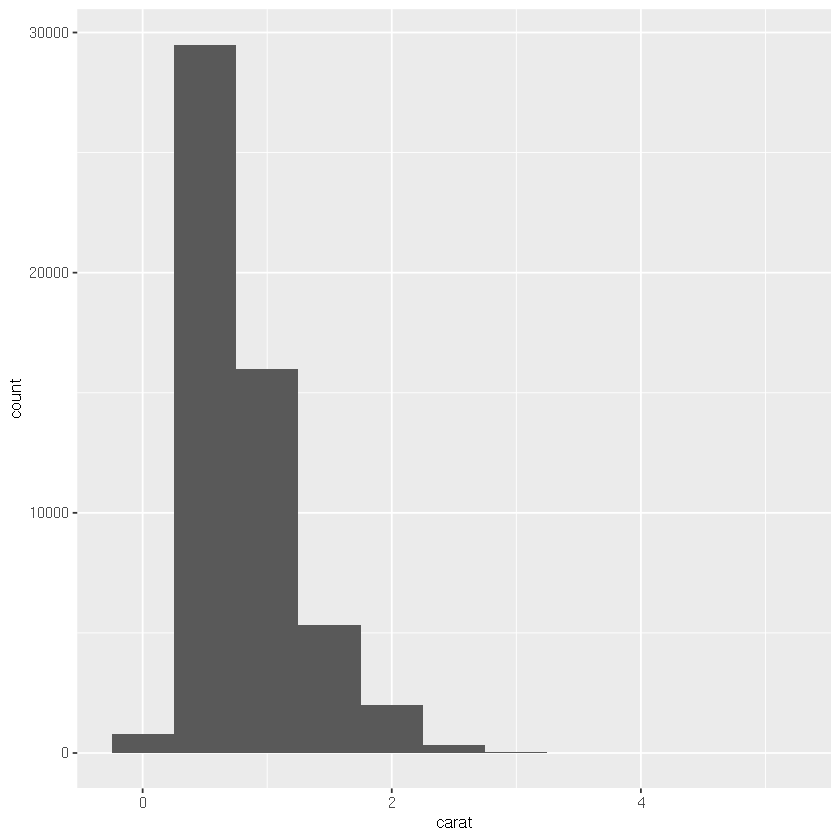

In [14]:
ggplot(data = diamonds ) +
    geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

A histogram divides the x-axis into equally spaced bins and then uses the height of a bar to display the number of observations that fall in each bin. In the graph above, the tallest bar shows that almost 30,000 observations have a carat value between 0.25 and 0.75, which are the left and right edges of the bar.

In [16]:
diamonds %>%
    count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4
"(4.25,4.75]",1


#### histogram - intervals

plotting a histogram on diamond carats smaller the size 3

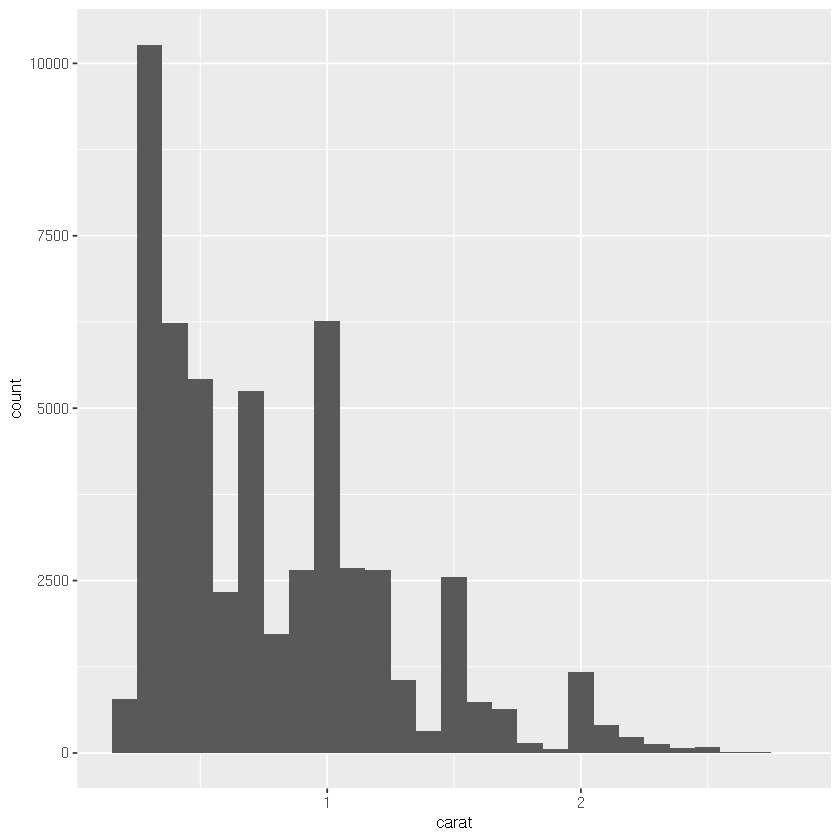

In [17]:
smaller <- diamonds %>%
    filter(carat < 3)

ggplot(data = smaller, mapping = aes(x = carat)) + 
    geom_histogram(binwidth = 0.1)

#### overaly of multiple histograms (via lines)

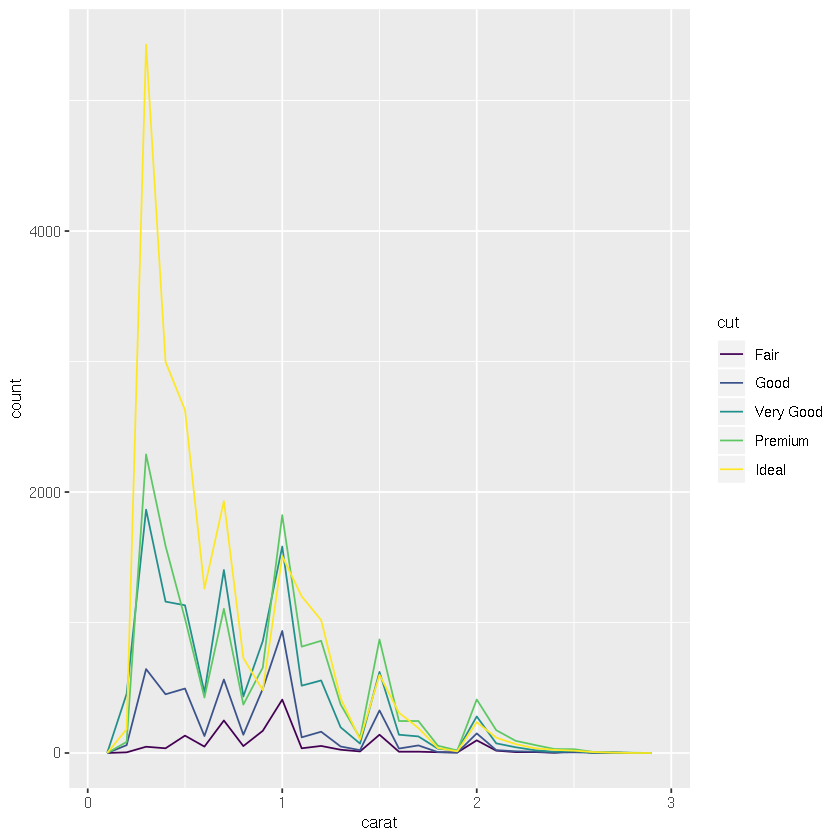

In [19]:
ggplot(data = smaller, mapping = aes(x = carat, color = cut)) + 
    geom_freqpoly(binwidth = 0.1)

In [20]:
nycflights13::flights %>% 
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  ) %>% 
  ggplot(mapping = aes(sched_dep_time)) + 
    geom_freqpoly(mapping = aes(colour = cancelled), binwidth = 1/4)

ERROR: Error in loadNamespace(name): there is no package called ‘nycflights13’


Distribution of price by cut using a boxplot

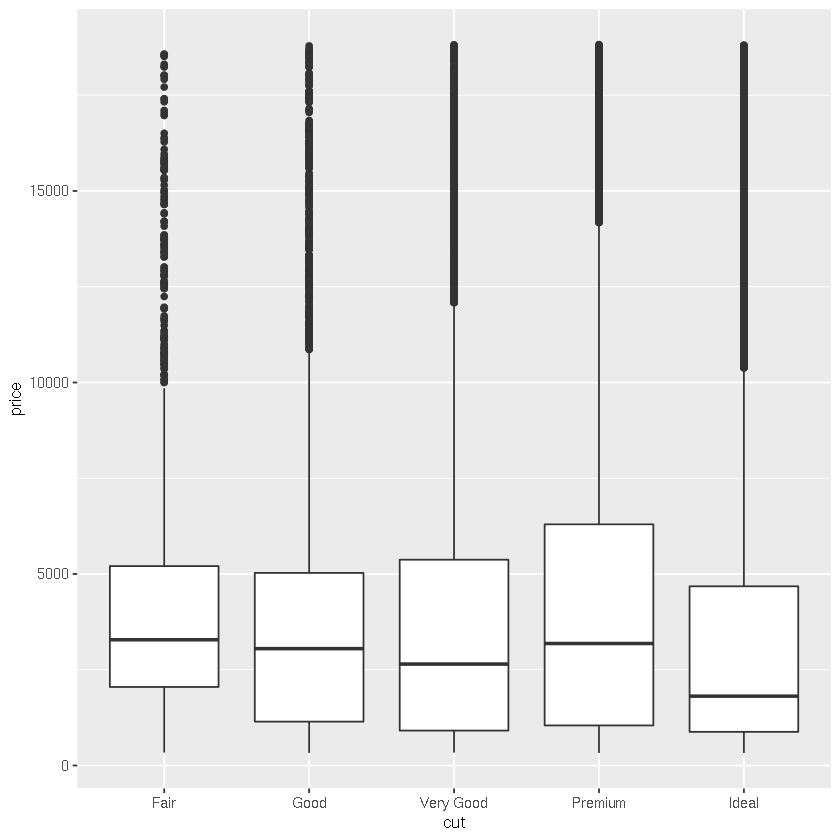

In [21]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()

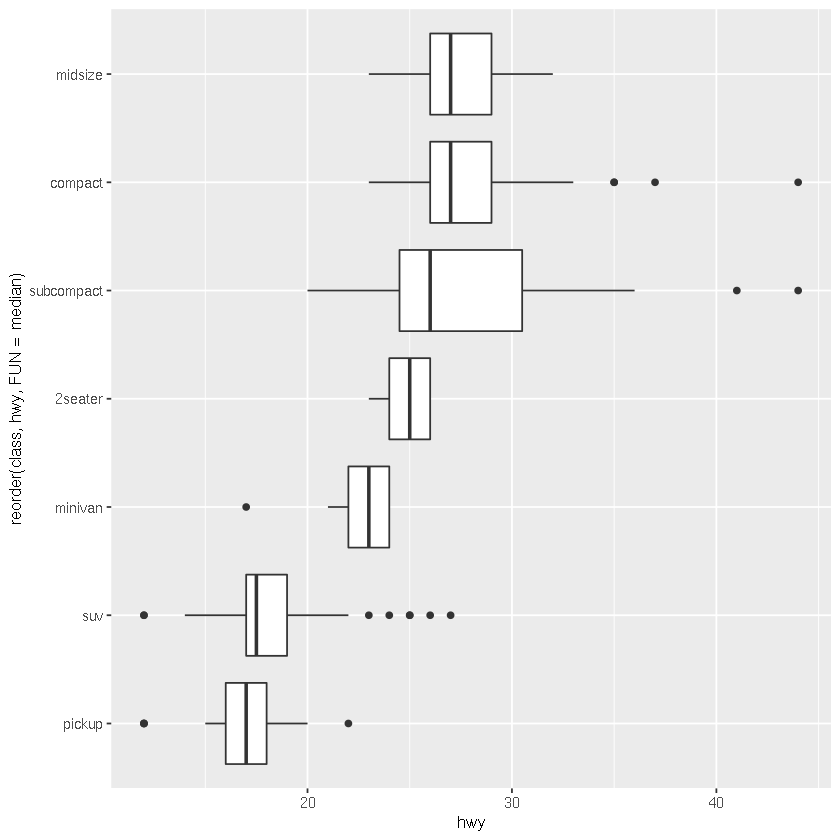

In [22]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy)) +
  coord_flip()